In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('sao_paulo.csv')
df1['District'] = df1['District'].map(lambda x: x.rstrip('São Paulo'))
df1['District'] = df1['District'].map(lambda x: x.rstrip('/'))

pd.options.display.max_rows = 999

df1.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


In [3]:
aluguel = df1[df1['Negotiation Type'] == 'rent']
aluguel = aluguel[aluguel['Latitude'] != 0]

compra= df1[df1['Negotiation Type'] == 'sale']

test = compra.drop('Price', axis = 1)

In [4]:
distrito1 = pd.DataFrame(aluguel.groupby('District').mean()).reset_index()

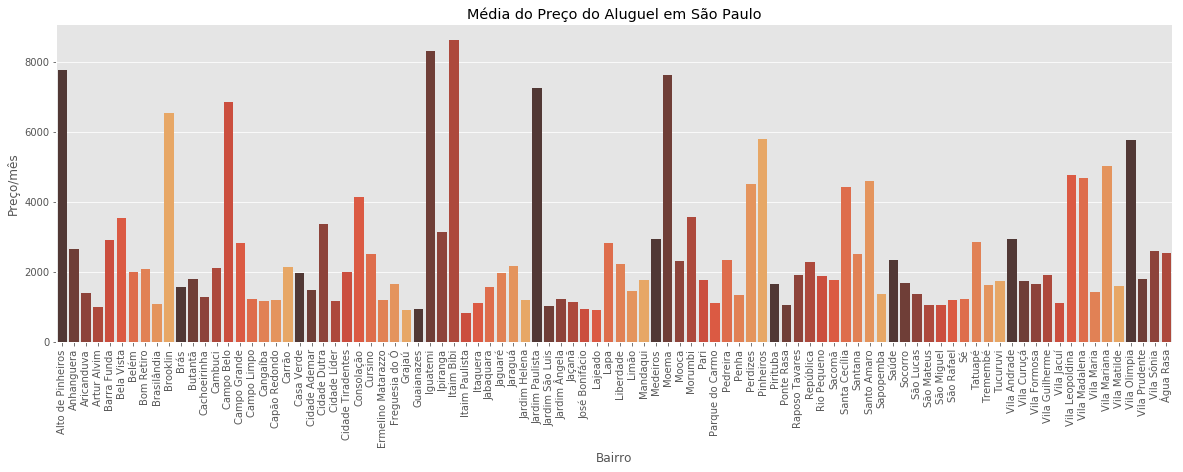

In [14]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.barplot('District', 'Price', data = distrito1, palette = sns.color_palette("YlOrRd_d", 10))
plt.xlabel('Bairro')
plt.ylabel('Preço/mês')
plt.title('Média do Preço do Aluguel em São Paulo')
plt.xticks(rotation = 90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('aluguel-sp.png')

In [8]:
distritocompra = round(pd.DataFrame(compra.groupby('District').mean())).reset_index()
distritocompra['Price'] = distritocompra['Price']/1000000

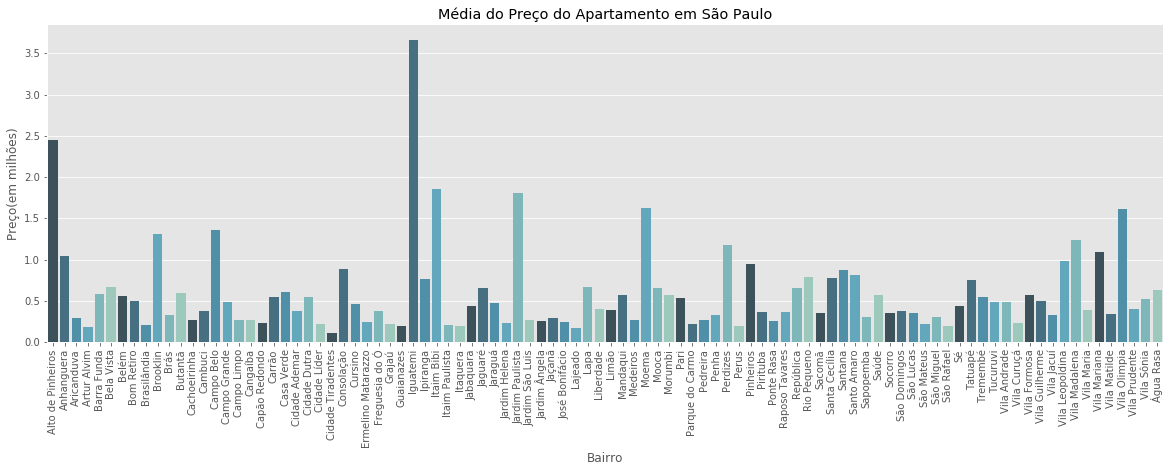

In [11]:

fig, ax = plt.subplots(figsize = (20, 7))
sns.barplot('District', 'Price', data = distritocompra, palette = sns.color_palette("GnBu_d"))
plt.xlabel('Bairro')
plt.ylabel('Preço(em milhões)')
plt.title('Média do Preço do Apartamento em São Paulo')
plt.xticks(rotation = 90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('compra-sp.png')

In [ ]:
distrito = round(pd.DataFrame(df1.groupby('District').mean())).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.barplot('District', 'Condo', data = distrito, palette = sns.color_palette("muted", 10))
plt.xlabel('Bairro')
plt.ylabel('Preço/mês')
plt.title('Preço Médio do Condomínio em São Paulo')
plt.xticks(rotation = 90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('condominio-sp.png')

In [ ]:
prices = aluguel.sort_values('Price', ascending = True)
price_high = prices.tail(1000)
price_low = prices.head(354)

price_low = price_low[price_low['Latitude'] != 0]
price_high = price_high[price_high['Latitude'] != 0]

price_high = price_high.drop(index = 4164)
price_low = price_low.drop(index = 4408)

In [ ]:
import mplleaflet

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(price_high['Longitude'], price_high['Latitude'],s = price_high['Size'])
ax.scatter(price_low['Longitude'], price_low['Latitude'], color = '#00aa00', s = price_low['Size'])
mplleaflet.display(fig = ax.figure)

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True)
plt.savefig('correlation-map.png')
plt.xticks(rotation = 45)